In [1]:
import tensorflow as tf
import os
from glob import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# EDA

In [2]:
label_nums = os.listdir('./dataset/mnist_png/training')
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [3]:
data_paths = glob('./dataset/mnist_png/training/*/*.png')
data_paths[0]

'./dataset/mnist_png/training\\0\\1.png'

In [4]:
len(data_paths)

60000

Label 0의 데이터 갯수 확인

In [5]:
len(os.listdir('./dataset/mnist_png/training/' + '0'))

5923

### 데이터 별 갯수 비교

In [6]:
nums_dataset = []

for lbl_n in label_nums:
    data_per_class = os.listdir('./dataset/mnist_png/training/' + lbl_n)
    nums_dataset.append(len(data_per_class))

In [7]:
nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

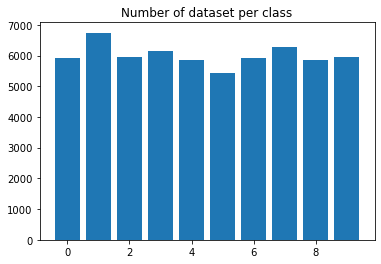

In [8]:
plt.bar(list(range(10)), nums_dataset)
plt.title('Number of dataset per class')
plt.show()

# Pillow로 이미지 열기

In [9]:
image_pil = Image.open(data_paths[0])
image = np.array(image_pil)

In [10]:
image.shape

(28, 28)

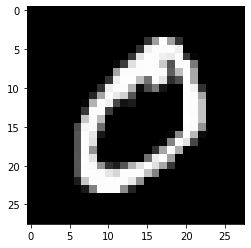

In [11]:
plt.imshow(image, 'gray')
plt.show()

# TensorFlow로 이미지 열기

In [12]:
gfile = tf.io.read_file(data_paths[0])
image = tf.io.decode_image(gfile)

In [13]:
image.shape

TensorShape([28, 28, 1])

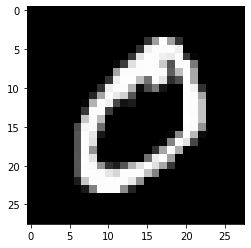

In [14]:
plt.imshow(image[:, :, 0], 'gray')
plt.show()

# Label 얻기

In [15]:
path = data_paths[-1]
path

'./dataset/mnist_png/training\\9\\9998.png'

In [16]:
path.split('\\')

['./dataset/mnist_png/training', '9', '9998.png']

In [17]:
def get_label(path):
    cls_n = path.split('\\')[-2]
    return int(cls_n)

In [18]:
lbl = get_label(path)
lbl

9

# 데이터 이미지 사이즈 알기

In [19]:
from tqdm.notebook import tqdm

In [20]:
heights = []
widths = []

# 이미지 사이즈가 다양한 경우 적용 --> 이미지 resize 작업 필요
for path in tqdm(data_paths):
    image_pil = Image.open(path)
    image = np.array(image_pil)
    h, w = image.shape
    
    heights.append(h)
    widths.append(w)

  0%|          | 0/60000 [00:00<?, ?it/s]

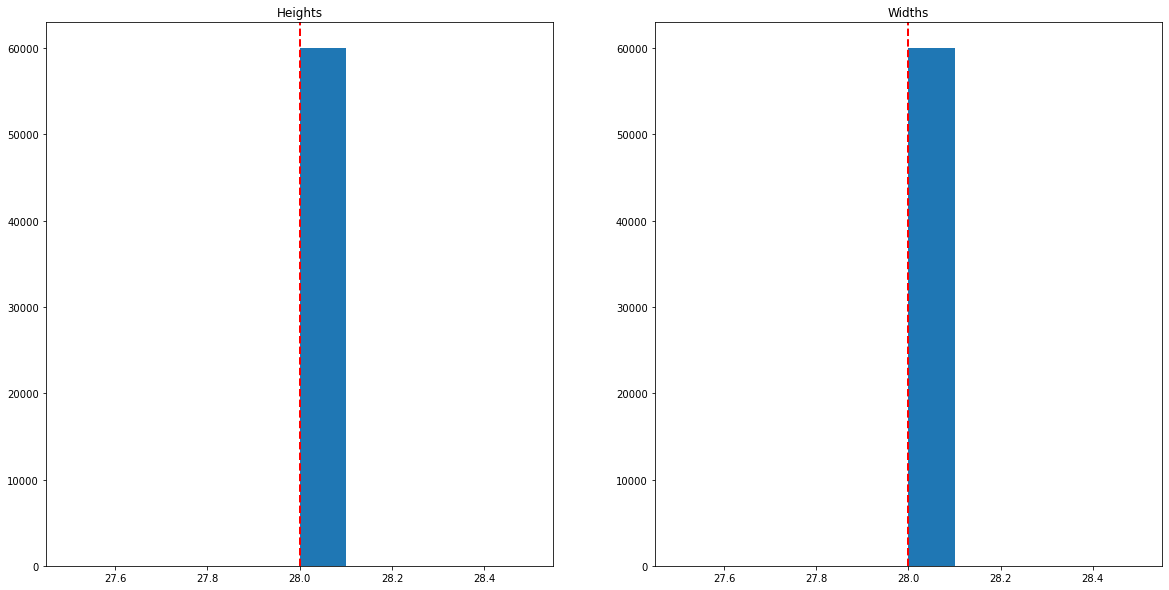

In [21]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color='r', linestyle='dashed', linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(widths), color='r', linestyle='dashed', linewidth=2)

plt.show()